In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('startup_without_missing_values.csv')

In [3]:
df_copy = pd.read_csv('startup_without_missing_values.csv')

In [4]:
df.describe()

,Internet Activity Score,Employee Count,Employees count MoM change,Last Funding Amount,Number of Co-founders,Number of of advisors,Team size Senior leadership,Industry trend in investing
count,472.000000,472.000000,472.000000,4.720000e+02,472.000000,472.000000,472.000000,472.000000
mean,106.701271,31.264831,-0.735169,5.996232e+06,1.868644,1.016949,3.730932,2.908898
std,210.334598,50.434458,18.022862,9.781646e+06,1.143481,2.014736,2.516539,0.769761
min,-725.000000,0.000000,-100.000000,1.000000e+04,0.000000,0.000000,1.000000,0.000000
25%,0.000000,8.000000,0.000000,6.711667e+05,1.000000,0.000000,2.000000,2.000000
50%,60.000000,31.000000,0.000000,2.116856e+06,2.000000,0.000000,3.000000,3.000000
75%,157.750000,31.000000,0.000000,7.000000e+06,2.250000,1.000000,5.000000,3.000000
max,1535.000000,594.000000,50.000000,7.700000e+07,7.000000,13.000000,24.000000,5.000000


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
label = LabelEncoder()

In [7]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = label.fit_transform(df[i])

In [8]:
df.corr()['Dependent-Company Status'].sort_values()

Experience in selling and building products                                             -0.559740
Breadth of experience across verticals                                                  -0.508465
Controversial history of founder or co founder                                          -0.499821
Client Reputation                                                                       -0.483341
Years of education                                                                      -0.477264
                                                                                           ...   
Gartner hype cycle stage                                                                 0.315751
Big Data Business                                                                        0.400316
Number of  Sales Support material                                                        0.461965
Survival through recession, based on existence of the company through recession times    0.647692
Dependent-Company St

<Axes: xlabel='Dependent-Company Status', ylabel='count'>

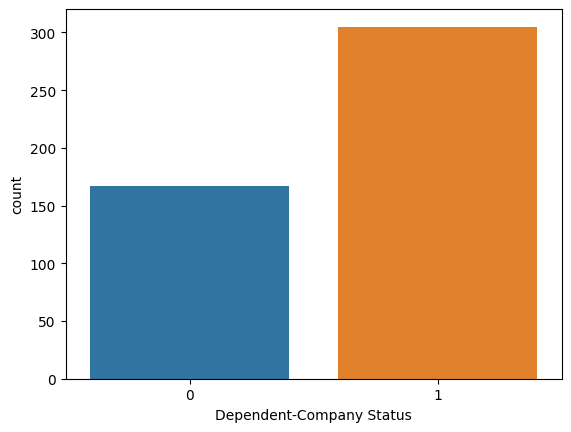

In [9]:
sns.countplot(data=df,x='Dependent-Company Status')

In [10]:
x = df.corr()['Dependent-Company Status'].sort_values()

In [11]:
x = x[abs(x)>0.4]

In [12]:
x = x.to_frame()

<Axes: >

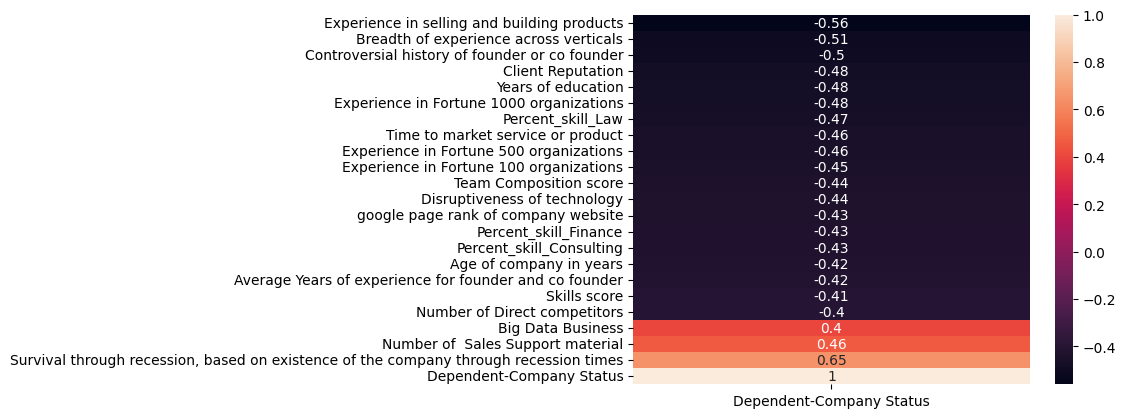

In [13]:
sns.heatmap(x, annot=True)

<Axes: ylabel='Survival through recession, based on existence of the company through recession times'>

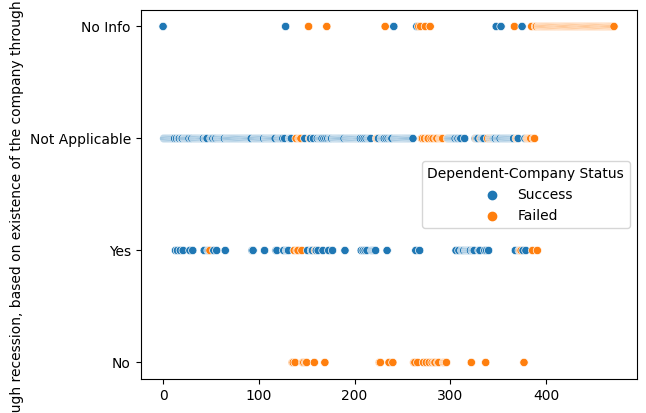

In [14]:
sns.scatterplot(x = list(range(472)), y = df_copy['Survival through recession, based on existence of the company through recession times'], hue = df_copy['Dependent-Company Status'])

In [15]:
factors = pd.DataFrame(columns = ['Main Factors', 'Percentage'])

In [16]:
factors['Main Factors'] = x.index

In [17]:
factors['Percentage'] = abs(x.values)

In [18]:
factors = factors.sort_values(by='Percentage')[::-1][1:].reset_index(drop=True)

In [19]:
factors['Percentage'] = round(factors['Percentage'] * 100, 4)

In [20]:
factors

,Main Factors,Percentage
0,"Survival through recession, based on existence...",64.7692
1,Experience in selling and building products,55.9740
2,Breadth of experience across verticals,50.8465
3,Controversial history of founder or co founder,49.9821
4,Client Reputation,48.3341
5,Years of education,47.7264
6,Experience in Fortune 1000 organizations,47.5522
7,Percent_skill_Law,46.6268
8,Number of Sales Support material,46.1965
9,Time to market service or product,45.5968


In [21]:
factors.to_csv('Driving_Factors_Success_or_Failure.csv', index=False, index_label=False)

# Principal Component Analysis

In [22]:
features = df.drop('Dependent-Company Status', axis = 1)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
features = scaler.fit_transform(features)

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=2)

In [28]:
principal_components = pca.fit_transform(features)

<Axes: >

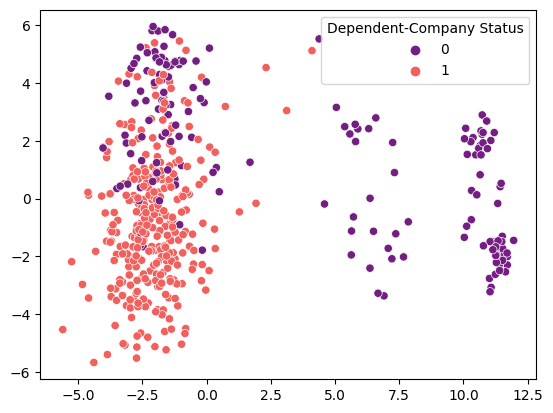

In [29]:
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=df['Dependent-Company Status'], palette = 'magma')

# Machine Learning Models

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
X = df.drop('Dependent-Company Status', axis = 1)
y = df_copy['Dependent-Company Status']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model = DecisionTreeClassifier()

In [38]:
pipe_dt = Pipeline([('scaler', scaler),('model', model)])

In [39]:
pipe_dt.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [40]:
y_pred = pipe_dt.predict(X_test_scaled)

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Failed       0.71      0.83      0.77        48
     Success       0.92      0.85      0.88       108

    accuracy                           0.85       156
   macro avg       0.82      0.84      0.83       156
weighted avg       0.86      0.85      0.85       156



In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
model = DecisionTreeClassifier()

In [79]:
params = {
    'model__criterion':["gini", "entropy", "log_loss"],
    'model__splitter' : ["best", "random"],
    'model__max_depth' : [None, 3, 7, 10, 15],
    'model__max_leaf_nodes': [None, 10, 50, 100, 145],
}

In [80]:
pipe_dt = Pipeline([('scaler', scaler),('model', model)])

In [81]:
full_model_dt = GridSearchCV(pipe_dt, param_grid=params, cv = 3, verbose = 2)

In [90]:
full_model_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] END model__criterion=gini, model__max_depth=None, model__max_leaf_nodes=None, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__max_leaf_nodes=None, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__max_leaf_nodes=None, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__max_leaf_nodes=None, model__splitter=random; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__max_leaf_nodes=None, model__splitter=random; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__max_leaf_nodes=None, model__splitter=random; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__max_leaf_nodes=10, model__splitter=best; total time=   0.0s
[CV] END model__criterion=gini, model__max_depth=None, model__max

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__criterion': ['gini', 'entropy', 'log_loss'],
                         'model__max_depth': [None, 3, 7, 10, 15],
                         'model__max_leaf_nodes': [None, 10, 50, 100, 145],
                         'model__splitter': ['best', 'random']},
             verbose=2)

In [91]:
full_model_dt.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 7,
 'model__max_leaf_nodes': 10,
 'model__splitter': 'random'}

In [92]:
y_pred = full_model_dt.predict(X_test_scaled)

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Failed       0.92      0.92      0.92        48
     Success       0.96      0.96      0.96       108

    accuracy                           0.95       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.95      0.95      0.95       156



In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [141]:
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Success')
    recall = recall_score(y_test, y_pred, pos_label='Success')
    f1 = f1_score(y_test, y_pred, pos_label='Success')

    metrics_dict = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    return metrics_dict


model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

def add_results(model_name, metrics_dict):
    global model_results
    new_row = pd.DataFrame({'Model': [model_name],
                            'Accuracy': [metrics_dict['accuracy']],
                            'F1 Score': [metrics_dict['f1']],
                            'Precision': [metrics_dict['precision']],
                            'Recall': [metrics_dict['recall']]})

    model_results = pd.concat([model_results, new_row], ignore_index=True)

In [142]:
metrics = calculate_metrics(y_test, y_pred)
add_results("DecisionTree", metrics)

Accuracy: 0.9487179487179487
Precision: 0.9629629629629629
Recall: 0.9629629629629629
F1 Score: 0.9629629629629629


In [143]:
model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTree,0.948718,0.962963,0.962963,0.962963


## RandomForest

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
model = RandomForestClassifier()

In [161]:
pipe_rf = Pipeline([('scaler', scaler),('rfc', model)])

In [162]:
pipe_rf.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfc', RandomForestClassifier())])

In [163]:
y_pred = pipe_rf.predict(X_test_scaled)

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Failed       0.85      0.92      0.88        48
     Success       0.96      0.93      0.94       108

    accuracy                           0.92       156
   macro avg       0.90      0.92      0.91       156
weighted avg       0.93      0.92      0.92       156



In [165]:
model = RandomForestClassifier()

In [166]:
params = {
    'rfc__n_estimators': [64, 96, 100, 120, 200],
    'rfc__criterion' : ["gini", "entropy", "log_loss"],
    'rfc__max_depth': [None, 3, 5, 7],
    'rfc__max_features' : ["sqrt", "log2", None],
    'rfc__bootstrap' : [True, False],
    'rfc__oob_score' : [True, False]
}

In [167]:
full_model_rf = GridSearchCV(pipe_rf, param_grid=params, cv = 3, verbose = 2)

In [168]:
full_model_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits
[CV] END rfc__bootstrap=True, rfc__criterion=gini, rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=64, rfc__oob_score=True; total time=   0.0s
[CV] END rfc__bootstrap=True, rfc__criterion=gini, rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=64, rfc__oob_score=True; total time=   0.0s
[CV] END rfc__bootstrap=True, rfc__criterion=gini, rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=64, rfc__oob_score=True; total time=   0.0s
[CV] END rfc__bootstrap=True, rfc__criterion=gini, rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=64, rfc__oob_score=False; total time=   0.0s
[CV] END rfc__bootstrap=True, rfc__criterion=gini, rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=64, rfc__oob_score=False; total time=   0.0s
[CV] END rfc__bootstrap=True, rfc__criterion=gini, rfc__max_depth=None, rfc__max_features=sqrt, rfc__n_estimators=64, rfc__oob_score=False; tota

C:\Users\adiya\OneDrive\Desktop\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
540 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adiya\OneDrive\Desktop\ML\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adiya\OneDrive\Desktop\ML\venv\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\adiya\OneDrive\Desktop\ML\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 437, in f

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'rfc__bootstrap': [True, False],
                         'rfc__criterion': ['gini', 'entropy', 'log_loss'],
                         'rfc__max_depth': [None, 3, 5, 7],
                         'rfc__max_features': ['sqrt', 'log2', None],
                         'rfc__n_estimators': [64, 96, 100, 120, 200],
                         'rfc__oob_score': [True, False]},
             verbose=2)

In [169]:
full_model_rf.best_params_

{'rfc__bootstrap': False,
 'rfc__criterion': 'gini',
 'rfc__max_depth': None,
 'rfc__max_features': 'log2',
 'rfc__n_estimators': 96,
 'rfc__oob_score': False}

In [170]:
y_pred = full_model_rf.predict(X_test_scaled)

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Failed       0.86      0.92      0.89        48
     Success       0.96      0.94      0.95       108

    accuracy                           0.93       156
   macro avg       0.91      0.93      0.92       156
weighted avg       0.93      0.93      0.93       156



In [172]:
metrics = calculate_metrics(y_test, y_pred)
add_results("RandomForest", metrics)

Accuracy: 0.9294871794871795
Precision: 0.9619047619047619
Recall: 0.9351851851851852
F1 Score: 0.9483568075117371


In [173]:
model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTree,0.948718,0.962963,0.962963,0.962963
1,RandomForest,0.929487,0.948357,0.961905,0.935185


## AdaBoost

In [174]:
from sklearn.ensemble import AdaBoostClassifier

In [175]:
model_ab = AdaBoostClassifier()

In [176]:
pipe_ab = Pipeline([('scaler', scaler),('model', model_ab)])

In [177]:
pipe_ab.fit(X_train_scaled,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', AdaBoostClassifier())])

In [178]:
y_pred = model_ab.predict(X_test_scaled)

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Failed       0.83      0.92      0.87        48
     Success       0.96      0.92      0.94       108

    accuracy                           0.92       156
   macro avg       0.90      0.92      0.90       156
weighted avg       0.92      0.92      0.92       156



In [180]:
params = {
    'model__n_estimators': list(range(64, 200)),
    'model__learning_rate':[0.01, 0.1, 1],
    'model__algorithm':['SAMME', 'SAMME.R']
}

In [181]:
full_model_ab = GridSearchCV(pipe_ab, param_grid=params, cv = 3, verbose = 2)

In [182]:
full_model_ab.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 816 candidates, totalling 2448 fits
[CV] END model__algorithm=SAMME, model__learning_rate=0.01, model__n_estimators=64; total time=   0.0s
[CV] END model__algorithm=SAMME, model__learning_rate=0.01, model__n_estimators=64; total time=   0.0s
[CV] END model__algorithm=SAMME, model__learning_rate=0.01, model__n_estimators=64; total time=   0.0s
[CV] END model__algorithm=SAMME, model__learning_rate=0.01, model__n_estimators=65; total time=   0.0s
[CV] END model__algorithm=SAMME, model__learning_rate=0.01, model__n_estimators=65; total time=   0.0s
[CV] END model__algorithm=SAMME, model__learning_rate=0.01, model__n_estimators=65; total time=   0.0s
[CV] END model__algorithm=SAMME, model__learning_rate=0.01, model__n_estimators=66; total time=   0.0s
[CV] END model__algorithm=SAMME, model__learning_rate=0.01, model__n_estimators=66; total time=   0.0s
[CV] END model__algorithm=SAMME, model__learning_rate=0.01, model__n_estimators=66; total time=   0.0s
[CV] END 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', AdaBoostClassifier())]),
             param_grid={'model__algorithm': ['SAMME', 'SAMME.R'],
                         'model__learning_rate': [0.01, 0.1, 1],
                         'model__n_estimators': [64, 65, 66, 67, 68, 69, 70, 71,
                                                 72, 73, 74, 75, 76, 77, 78, 79,
                                                 80, 81, 82, 83, 84, 85, 86, 87,
                                                 88, 89, 90, 91, 92, 93, ...]},
             verbose=2)

In [183]:
y_pred = full_model_ab.predict(X_test_scaled)

In [184]:
full_model_ab.best_params_

{'model__algorithm': 'SAMME.R',
 'model__learning_rate': 1,
 'model__n_estimators': 78}

In [185]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Failed       0.85      0.94      0.89        48
     Success       0.97      0.93      0.95       108

    accuracy                           0.93       156
   macro avg       0.91      0.93      0.92       156
weighted avg       0.93      0.93      0.93       156



In [186]:
metrics = calculate_metrics(y_test, y_pred)
add_results("AdaBoost", metrics)

Accuracy: 0.9294871794871795
Precision: 0.970873786407767
Recall: 0.9259259259259259
F1 Score: 0.9478672985781991


In [187]:
model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTree,0.948718,0.962963,0.962963,0.962963
1,RandomForest,0.929487,0.948357,0.961905,0.935185
2,AdaBoost,0.929487,0.947867,0.970874,0.925926


## GradientBoost

In [188]:
from sklearn.ensemble import GradientBoostingClassifier

In [189]:
model_gb = GradientBoostingClassifier()

In [190]:
pipe_gb = Pipeline([('scaler', scaler),('model', model_gb)])

In [191]:
pipe_gb.fit(X_train_scaled, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [192]:
y_pred = pipe_gb.predict(X_test_scaled)

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Failed       0.83      0.90      0.86        48
     Success       0.95      0.92      0.93       108

    accuracy                           0.91       156
   macro avg       0.89      0.91      0.90       156
weighted avg       0.91      0.91      0.91       156



In [194]:
model_gb= GradientBoostingClassifier()

In [195]:
params = {
    'model__n_estimators' : [64, 80, 96, 100, 120, 200],
    'model__loss' : ['log_loss', 'exponential'],
    'model__learning_rate' : [0.01, 0.1, 1],
    'model__max_depth' : [3, 5, 7, 10],
    'model__max_leaf_nodes': [None, 50, 100, 145]
}

In [196]:
full_model_gb = GridSearchCV(pipe_gb, param_grid=params, cv = 3, verbose = 2)

In [197]:
full_model_gb.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] END model__learning_rate=0.01, model__loss=log_loss, model__max_depth=3, model__max_leaf_nodes=None, model__n_estimators=64; total time=   0.0s
[CV] END model__learning_rate=0.01, model__loss=log_loss, model__max_depth=3, model__max_leaf_nodes=None, model__n_estimators=64; total time=   0.0s
[CV] END model__learning_rate=0.01, model__loss=log_loss, model__max_depth=3, model__max_leaf_nodes=None, model__n_estimators=64; total time=   0.0s
[CV] END model__learning_rate=0.01, model__loss=log_loss, model__max_depth=3, model__max_leaf_nodes=None, model__n_estimators=80; total time=   0.0s
[CV] END model__learning_rate=0.01, model__loss=log_loss, model__max_depth=3, model__max_leaf_nodes=None, model__n_estimators=80; total time=   0.0s
[CV] END model__learning_rate=0.01, model__loss=log_loss, model__max_depth=3, model__max_leaf_nodes=None, model__n_estimators=80; total time=   0.0s
[CV] END model__learning_rate=0.01, model_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.01, 0.1, 1],
                         'model__loss': ['log_loss', 'exponential'],
                         'model__max_depth': [3, 5, 7, 10],
                         'model__max_leaf_nodes': [None, 50, 100, 145],
                         'model__n_estimators': [64, 80, 96, 100, 120, 200]},
             verbose=2)

In [198]:
full_model_gb.best_params_

{'model__learning_rate': 1,
 'model__loss': 'exponential',
 'model__max_depth': 5,
 'model__max_leaf_nodes': None,
 'model__n_estimators': 120}

In [199]:
y_pred = full_model_gb.predict(X_test_scaled)

In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Failed       0.86      0.90      0.88        48
     Success       0.95      0.94      0.94       108

    accuracy                           0.92       156
   macro avg       0.91      0.92      0.91       156
weighted avg       0.92      0.92      0.92       156



In [201]:
metrics = calculate_metrics(y_test, y_pred)
add_results("GradientBoost", metrics)

Accuracy: 0.9230769230769231
Precision: 0.9528301886792453
Recall: 0.9351851851851852
F1 Score: 0.9439252336448598


In [202]:
model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTree,0.948718,0.962963,0.962963,0.962963
1,RandomForest,0.929487,0.948357,0.961905,0.935185
2,AdaBoost,0.929487,0.947867,0.970874,0.925926
3,GradientBoost,0.923077,0.943925,0.952830,0.935185


## DNN

In [203]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop, Adam, SGD, Adamax, Nadam
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

In [204]:
y_train_encoded = label.fit_transform(y_train)
y_test_encoded = label.transform(y_test)

In [211]:
model = Sequential([
    Dense(units=512, activation='relu', input_dim = X_test_scaled.shape[1]),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='va_loss', patience=20)


In [212]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=120, validation_data=(X_test_scaled, y_test_encoded))

Epoch 1/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5462 - loss: 0.8199 - val_accuracy: 0.5897 - val_loss: 0.6926
Epoch 2/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4478 - loss: 0.9577 - val_accuracy: 0.6218 - val_loss: 0.6858
Epoch 3/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5018 - loss: 0.9427 - val_accuracy: 0.6474 - val_loss: 0.6776
Epoch 4/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4923 - loss: 0.8497 - val_accuracy: 0.6731 - val_loss: 0.6648
Epoch 5/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5302 - loss: 0.8406 - val_accuracy: 0.6859 - val_loss: 0.6544
Epoch 6/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5625 - loss: 0.8872 - val_accuracy: 0.6923 - val_loss: 0.6460
Epoch 7/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4773 - loss: 0.9175 - val_accuracy: 0.6859 - val_loss: 0.6380
Epoch 8/120
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5303 - loss: 0.7938 - val_accuracy: 0.6923 - 

In [213]:
y_pred = model.predict(X_test_scaled)
y_pred_class = np.where(y_pred > 0.5, 1, 0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [214]:
print(classification_report(y_test_encoded, y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        48
           1       0.95      0.97      0.96       108

    accuracy                           0.94       156
   macro avg       0.94      0.92      0.93       156
weighted avg       0.94      0.94      0.94       156



In [215]:
model_results

,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTree,0.948718,0.962963,0.962963,0.962963
1,RandomForest,0.929487,0.948357,0.961905,0.935185
2,AdaBoost,0.929487,0.947867,0.970874,0.925926
3,GradientBoost,0.923077,0.943925,0.952830,0.935185


In [216]:
model_results.sort_values(by='Accuracy')[::-1]

,Model,Accuracy,F1 Score,Precision,Recall
0,DecisionTree,0.948718,0.962963,0.962963,0.962963
2,AdaBoost,0.929487,0.947867,0.970874,0.925926
1,RandomForest,0.929487,0.948357,0.961905,0.935185
3,GradientBoost,0.923077,0.943925,0.952830,0.935185


In [217]:
import joblib

In [218]:
joblib.dump(full_model_dt, 'my_model.pkl')

['my_model.pkl']